![world-cup-18](images/fifa-world-cup-2022.jpg)

In [57]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import chart_studio.plotly as py

import plotly.graph_objs as go

## 1 - Data Preparation
### 1.1 Load Data

In [27]:
FIFA22 = pd.read_csv('FIFA22_official_data.csv', low_memory=False)
FIFA22.columns

FIFA22.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


Let's select the most interesting columns from loaded dataset:

In [29]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Best Position'
]
FIFA22 = pd.DataFrame(FIFA22, columns=interesting_columns)

### 1.2 Summarize Data

In [30]:
FIFA22.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Best Position
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,CAM
1,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,CM
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,ST
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,CM
4,M. Acuña,29,Argentina,84,84,Sevilla FC,€37M,€45K,LB


In [31]:
FIFA22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           16710 non-null  object
 1   Age            16710 non-null  int64 
 2   Nationality    16710 non-null  object
 3   Overall        16710 non-null  int64 
 4   Potential      16710 non-null  int64 
 5   Club           16446 non-null  object
 6   Value          16710 non-null  object
 7   Wage           16710 non-null  object
 8   Best Position  16710 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


### 1.3 Preprocess Data
Right away I can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Thus I'll preprocess the data to make it usable. I will use short supporting function to convert values in those two columns into numbers. I will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [32]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
FIFA22['ValueNum'] = FIFA22['Value'].apply(lambda x: str2number(x))
FIFA22['WageNum'] = FIFA22['Wage'].apply(lambda x: str2number(x))

To make things simpler, I select the first position from list as preferred and save it in 'Position' column.

In [33]:
FIFA22['Position'] = FIFA22['Best Position'].str.split().str[0]
print(FIFA22['Best Position']) 

0        CAM
1         CM
2         ST
3         CM
4         LB
        ... 
16705     GK
16706     GK
16707     GK
16708     GK
16709     ST
Name: Best Position, Length: 16710, dtype: object


## 2 - Data Visualization
### 2.1 Age

C:\Users\Chaitanya Srusti\AppData\Local\Temp\ipykernel_21864\186048482.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




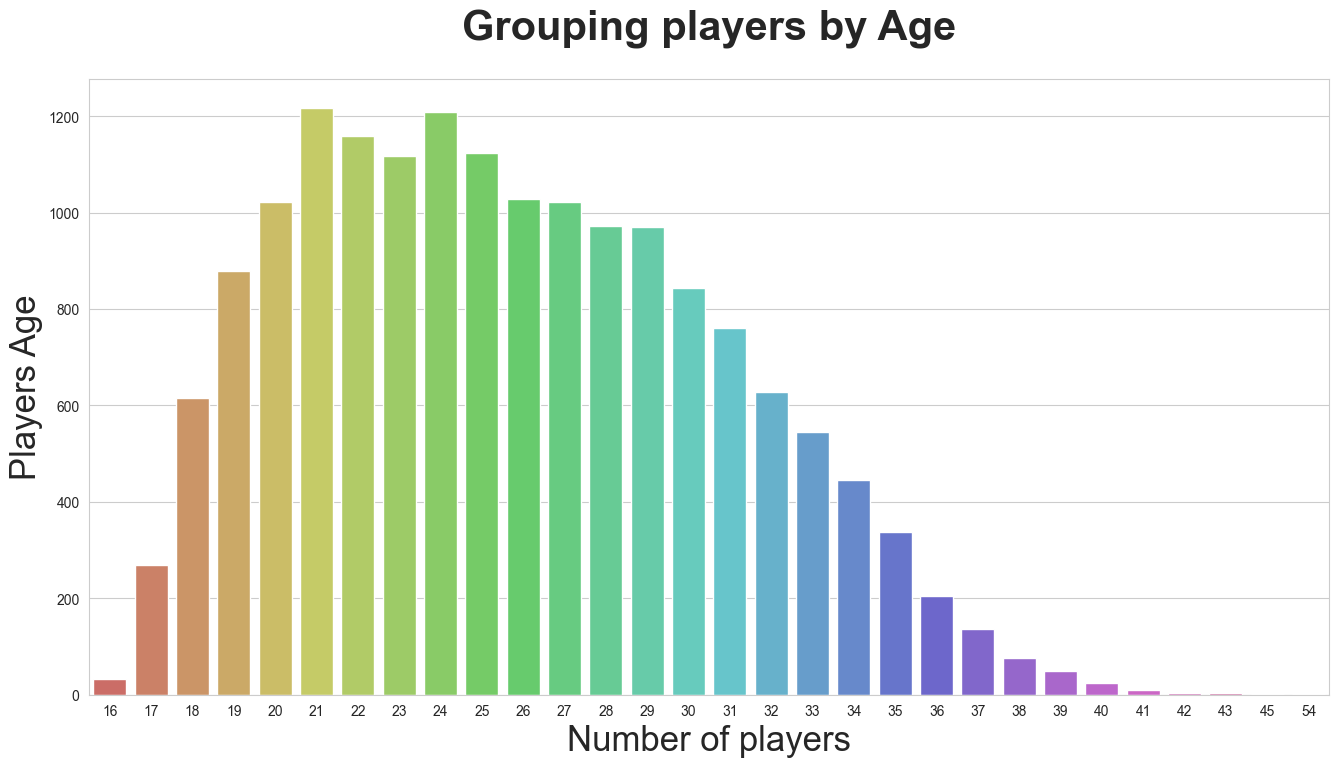

In [50]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA22, palette="hls");
plt.show()

### 2.2 Overall

C:\Users\Chaitanya Srusti\AppData\Local\Temp\ipykernel_21864\671548356.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




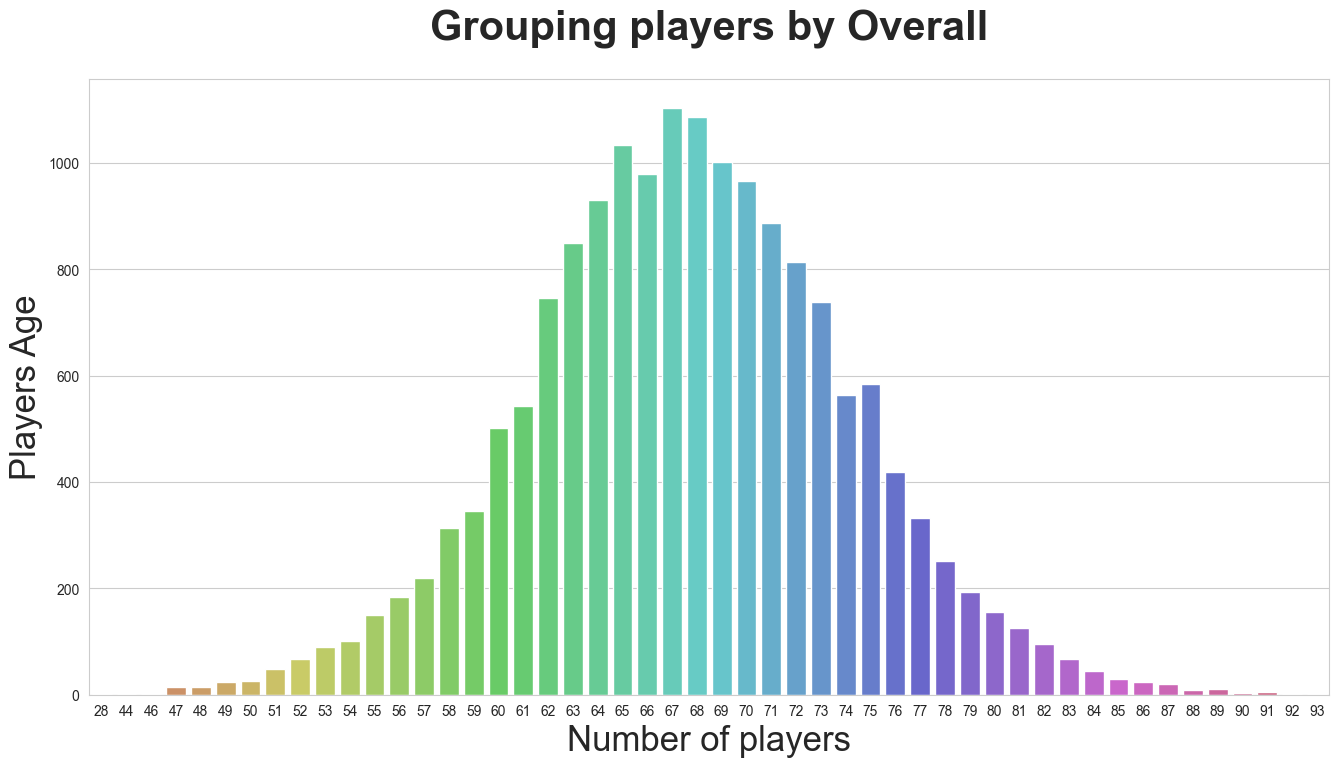

In [51]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA22, palette="hls");
plt.show()

### 2.3 Preferred Position

C:\Users\Chaitanya Srusti\AppData\Local\Temp\ipykernel_21864\3536176106.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




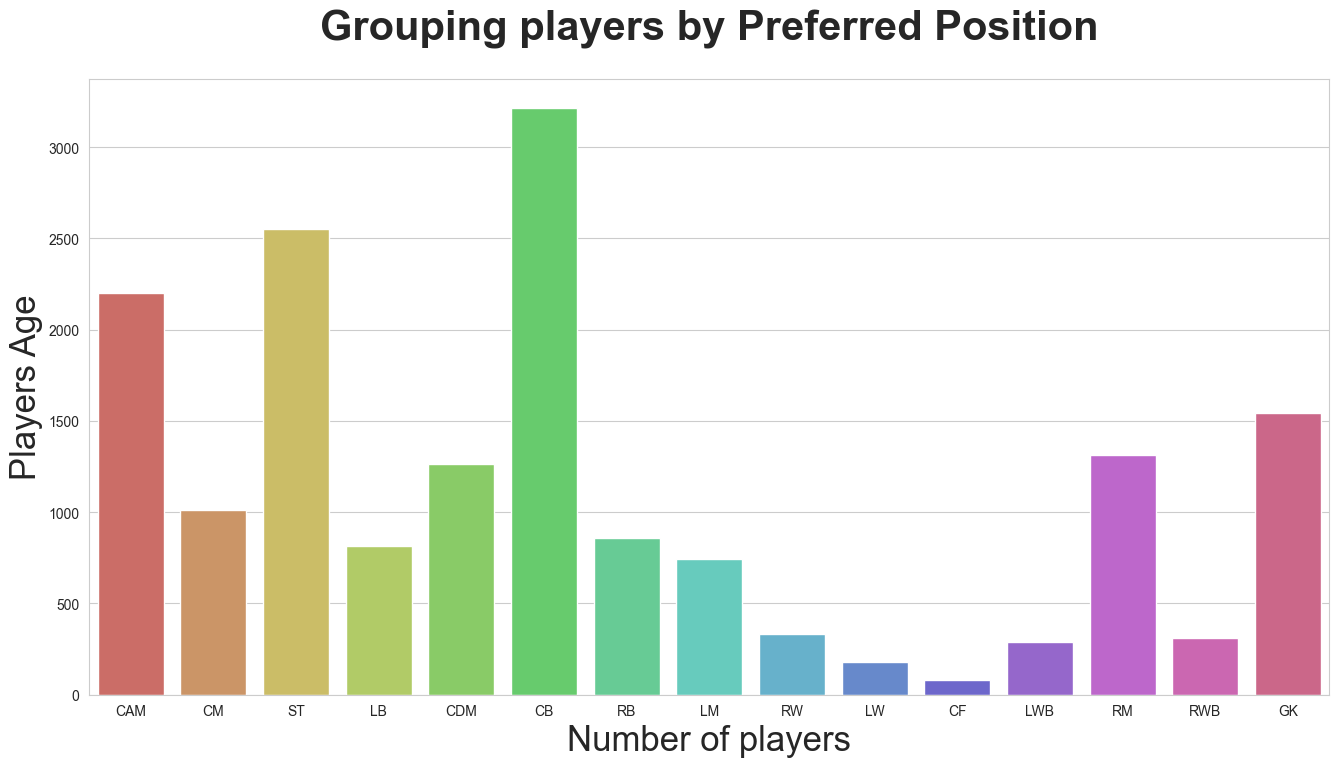

In [52]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA22, palette="hls");
plt.show()

### 2.4 Nationality

In [60]:
# Grouping the data by countries
valcon = FIFA22.groupby("Nationality").size().reset_index(name="Count").sort_values(by="Count", ascending=False)
valcon


,Nationality,Count
48,England,1845
144,Spain,1151
59,Germany,1120
55,France,987
6,Argentina,846
...,...,...
134,Saint Lucia,1
50,Eritrea,1
65,Guatemala,1
64,Guam,1


In [61]:
FIFA22["Nationality"].value_counts().head(25)

Nationality
England                1845
Spain                  1151
Germany                1120
France                  987
Argentina               846
Brazil                  819
Italy                   514
Netherlands             443
Portugal                354
United States           341
Mexico                  312
Republic of Ireland     308
Scotland                292
Japan                   284
Belgium                 267
Denmark                 264
Sweden                  263
Norway                  261
Poland                  261
Colombia                257
Turkey                  246
Uruguay                 243
Austria                 230
Switzerland             182
Australia               180
Name: count, dtype: int64

I can see that the players are very centralized in Europe. To be precise, England, Germany, Spain, and France.

### 2.5 Value
Let's see the 20 players with highest value:

In [62]:
sorted_players = FIFA22.sort_values(["ValueNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].values

In [63]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Value
K. Mbappé,22,France,Paris Saint-Germain,ST,€194M
E. Haaland,20,Norway,Borussia Dortmund,ST,€137.5M
H. Kane,27,England,Tottenham Hotspur,ST,€129.5M
Neymar Jr,29,Brazil,Paris Saint-Germain,LW,€129M
K. De Bruyne,30,Belgium,Manchester City,CM,€125.5M
G. Donnarumma,22,Italy,Paris Saint-Germain,GK,€119.5M
F. de Jong,24,Netherlands,FC Barcelona,CM,€119.5M
R. Lewandowski,32,Poland,FC Bayern München,ST,€119.5M
J. Sancho,21,England,Manchester United,CAM,€116.5M
T. Alexander-Arnold,22,England,Liverpool,RB,€114M


Let's make a scatter chart of the players' Value with respect to their Age and Overall:

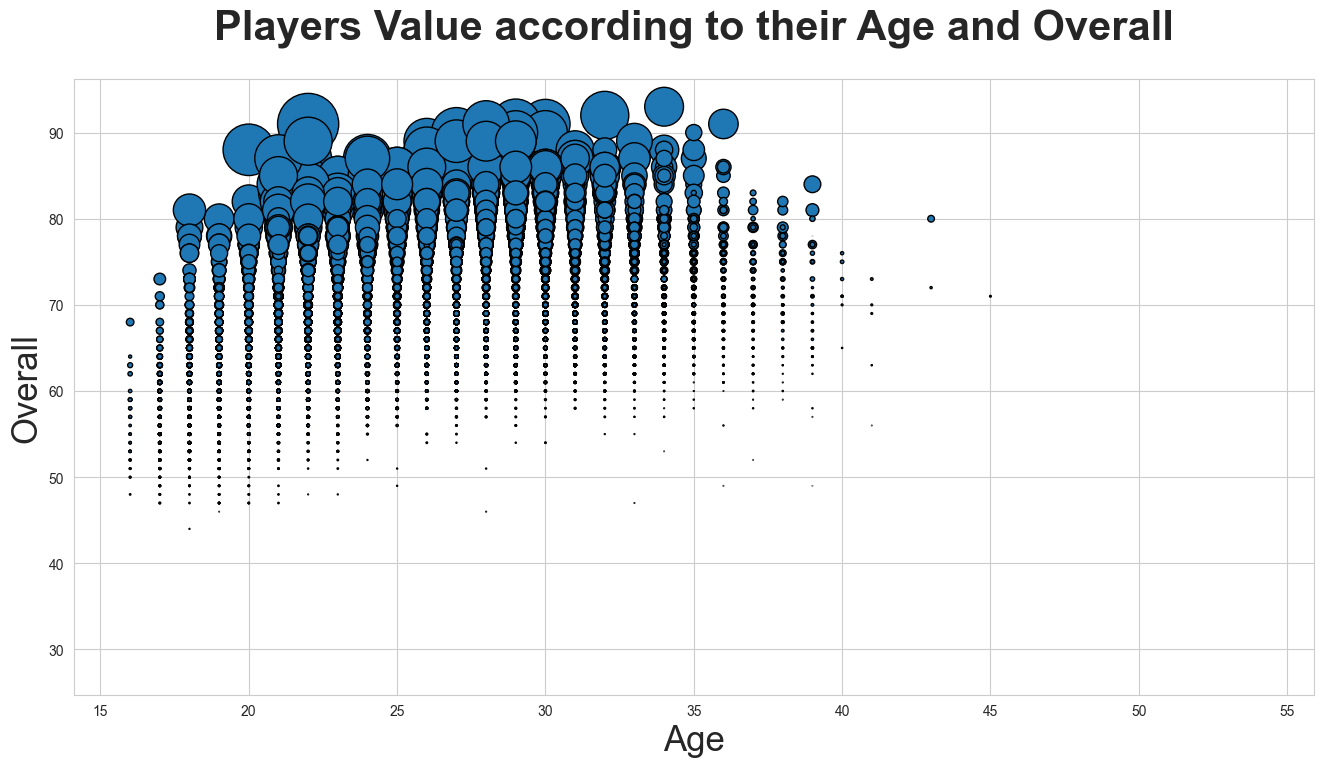

In [64]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA22["Age"].values
overall = FIFA22["Overall"].values
value = FIFA22["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 2.6 Wage
Let's see the 20 players with highest wage:

In [65]:
sorted_players = FIFA22.sort_values(["WageNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].values

In [66]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Wage
K. De Bruyne,30,Belgium,Manchester City,CM,€350K
K. Benzema,33,France,Real Madrid CF,CF,€350K
L. Messi,34,Argentina,Paris Saint-Germain,RW,€320K
Casemiro,29,Brazil,Real Madrid CF,CDM,€310K
T. Kroos,31,Germany,Real Madrid CF,CM,€310K
R. Sterling,26,England,Manchester City,LW,€290K
Neymar Jr,29,Brazil,Paris Saint-Germain,LW,€270K
S. Mané,29,Senegal,Liverpool,LW,€270K
Cristiano Ronaldo,36,Portugal,Manchester United,ST,€270K
M. Salah,29,Egypt,Liverpool,RW,€270K


Let's make a scatter chart of the players' Wage with respect to their Age and Overall:

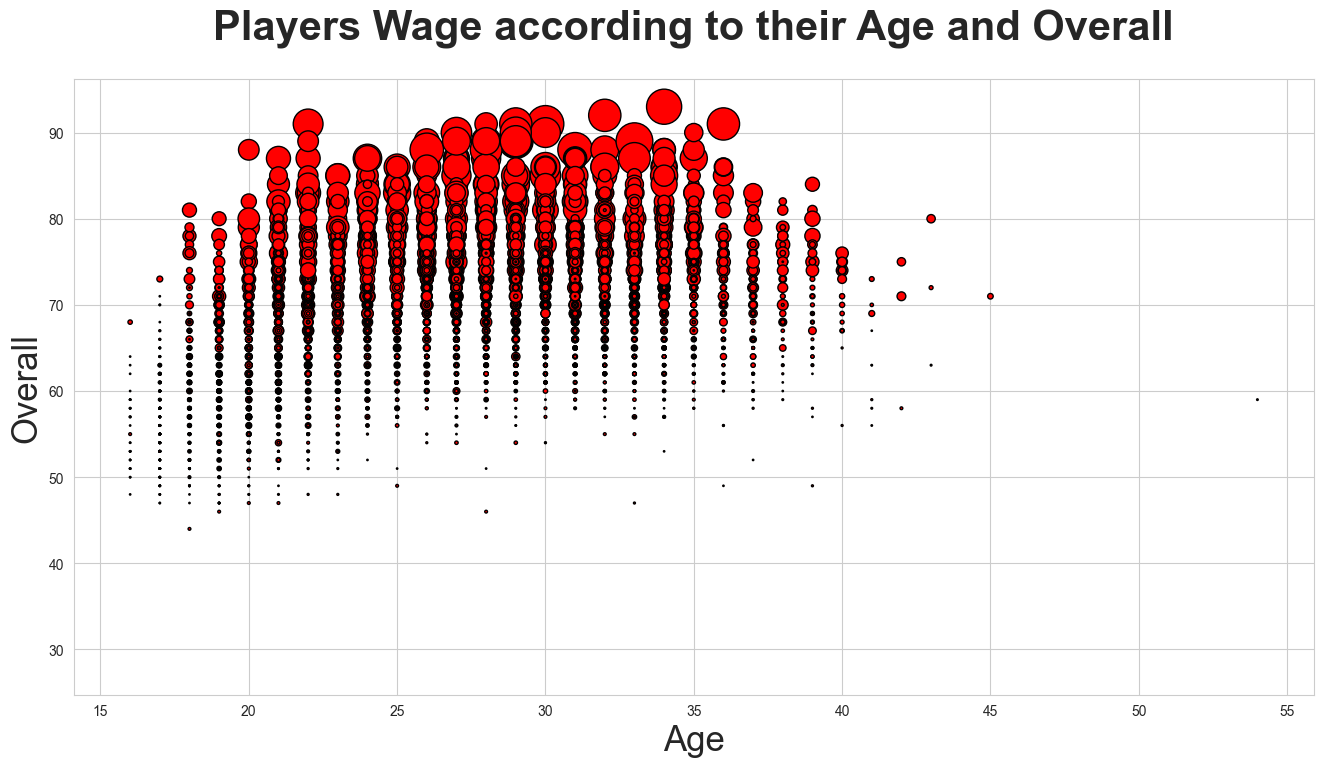

In [67]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA22["Age"].values
overall = FIFA22["Overall"].values
value = FIFA22["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

## 3 - Best Squad Analysis
For simplicity of this analysis, I only pull in data I am interested in:

In [68]:
FIFA22 = FIFA22[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA22.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,CAM,€107.5M,€250K
1,L. Goretzka,26,Germany,87,88,FC Bayern München,CM,€93M,€140K
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,ST,€44.5M,€135K
3,K. De Bruyne,30,Belgium,91,91,Manchester City,CM,€125.5M,€350K
4,M. Acuña,29,Argentina,84,84,Sevilla FC,LB,€37M,€45K
5,J. Kimmich,26,Germany,89,90,FC Bayern München,CDM,€108M,€160K
6,Paulinho,32,Brazil,83,83,Al Ahli,CM,€28.5M,€61K
7,G. Wijnaldum,30,Netherlands,84,84,Paris Saint-Germain,CM,€40.5M,€115K
8,E. Can,27,Germany,82,83,Borussia Dortmund,CDM,€35M,€72K
9,A. Griezmann,30,France,85,85,Atlético de Madrid,CAM,€53M,€220K


### 3.1 Squad of Highest Overall Players
What's the best squad according to FIFA 18 purely based on overall rating?

In [69]:
def get_best_squad(formation):
    FIFA22_copy = FIFA22.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [70]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position              Player Overall Age                Club   Value  Wage
      GK            J. Oblak      91  28  Atlético de Madrid   €112M €130K
      RB T. Alexander-Arnold      87  22           Liverpool   €114M €150K
      CB         V. van Dijk      89  29           Liverpool    €86M €230K
      CB        Sergio Ramos      88  35 Paris Saint-Germain    €24M €115K
      LB        A. Robertson      87  27           Liverpool  €83.5M €175K
     CDM            N. Kanté      90  30             Chelsea   €100M €230K
      CM        K. De Bruyne      91  30     Manchester City €125.5M €350K
     CAM     Bruno Fernandes      88  26   Manchester United €107.5M €250K
      RW            L. Messi      93  34 Paris Saint-Germain    €78M €320K
      ST      R. Lewandowski      92  32   FC Bayern München €119.5M €270K
      LW           Neymar Jr      91  29 Paris Saint-Germain   €129M €270K


In [71]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position              Player Overall Age                Club   Value  Wage
      GK            J. Oblak      91  28  Atlético de Madrid   €112M €130K
      RB T. Alexander-Arnold      87  22           Liverpool   €114M €150K
      CB         V. van Dijk      89  29           Liverpool    €86M €230K
      CB        Sergio Ramos      88  35 Paris Saint-Germain    €24M €115K
      LB        A. Robertson      87  27           Liverpool  €83.5M €175K
      RM           S. Gnabry      85  25   FC Bayern München  €64.5M €110K
      CM        K. De Bruyne      91  30     Manchester City €125.5M €350K
      CM            T. Kroos      88  31      Real Madrid CF    €75M €310K
      LM              H. Son      89  28   Tottenham Hotspur   €104M €220K
      ST      R. Lewandowski      92  32   FC Bayern München €119.5M €270K
      ST   Cristiano Ronaldo      91  36   Manchester United    €45M €270K


In [72]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position              Player Overall Age                Club   Value  Wage
      GK            J. Oblak      91  28  Atlético de Madrid   €112M €130K
      RB T. Alexander-Arnold      87  22           Liverpool   €114M €150K
      CB         V. van Dijk      89  29           Liverpool    €86M €230K
      CB        Sergio Ramos      88  35 Paris Saint-Germain    €24M €115K
      LB        A. Robertson      87  27           Liverpool  €83.5M €175K
     CDM            N. Kanté      90  30             Chelsea   €100M €230K
     CDM          J. Kimmich      89  26   FC Bayern München   €108M €160K
     CAM     Bruno Fernandes      88  26   Manchester United €107.5M €250K
     CAM           T. Müller      87  31   FC Bayern München    €66M €140K
     CAM           P. Dybala      87  27            Juventus    €93M €160K
      ST      R. Lewandowski      92  32   FC Bayern München €119.5M €270K


Alright, now let's move onto studying different squad's impact on Nationality teams. First let's modifiy above get_summary and get_best_squad functions for Nationality:

In [73]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA22_copy = FIFA22.copy()
    FIFA22_copy = FIFA22_copy[FIFA22_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [74]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

Also let's make our squad choices more strict:

In [75]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [76]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

### 3.2 France
Let's explore different squad possibility of France and how it affects the ratings:

In [77]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

               Squad  Overall  Potential
Nationality                             
France         3-4-3    85.09      88.45
France         4-4-2    85.64      88.55
France       4-3-1-2    85.91      88.73
France         4-3-3    85.27      88.45
France       4-2-3-1    85.27      88.45


So we can say that France has the best squard as 4-3-3 for the current squad; and 4-4-2, 4-3-3, and 4-2-3-1 for the future squad based on team ratings. Let's check out the best 11 squad line-up of France in 4-3-3 for current rating as well as 4-4-2 for potential rating:

In [78]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 85.3
Position       Player Overall Age                Club  Value  Wage
      GK    H. Lloris      87  34   Tottenham Hotspur €13.5M €125K
      RB    B. Pavard      79  25   FC Bayern München €21.5M  €64K
      CB    R. Varane      86  28   Manchester United €68.5M €180K
      CB L. Hernández      83  25   FC Bayern München €44.5M  €85K
      LB     L. Digne      84  27             Everton €40.5M €110K
     CDM     N. Kanté      90  30             Chelsea  €100M €230K
      CM     P. Pogba      87  28   Manchester United €79.5M €220K
     CAM A. Griezmann      85  30  Atlético de Madrid   €53M €220K
      RW   F. Thauvin      80  28     Tigres U.A.N.L.   €21M  €64K
      ST    K. Mbappé      91  22 Paris Saint-Germain  €194M €230K
      LM     K. Coman      86  25   FC Bayern München   €81M €120K


In [79]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential-
Average rating: 88.5
Position       Player Potential Age                Club  Value  Wage
      GK   M. Maignan        89  25            AC Milan €49.5M  €45K
      RB    B. Pavard        82  25   FC Bayern München €21.5M  €64K
      CB D. Upamecano        90  22   FC Bayern München   €64M  €70K
      CB    J. Koundé        89  22          Sevilla FC   €53M  €33K
      LB T. Hernández        90  23            AC Milan €62.5M  €51K
      RM     J. Bamba        83  25          LOSC Lille   €28M  €42K
     CDM     N. Kanté        90  30             Chelsea  €100M €230K
      CM E. Camavinga        89  18      Real Madrid CF €29.5M  €44K
      LM   O. Dembélé        88  24        FC Barcelona   €55M €165K
      ST    K. Mbappé        95  22 Paris Saint-Germain  €194M €230K
      CF   K. Benzema        89  33      Real Madrid CF   €66M €350K


![griezmann](images/griezmann.jpeg)

### 3.3 Germany
The holding champion is certainly a heavy candidate for this year's 1st place:

In [80]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

               Squad  Overall  Potential
Nationality                             
Germany        3-4-3    85.18      87.00
Germany        4-4-2    84.91      87.36
Germany      4-3-1-2    86.36      88.27
Germany        4-3-3    85.55      87.73
Germany      4-2-3-1    85.55      87.64


As you can see, Germany's current ratings peak with either 3-4-3 or 4-3-3 formation; while those 2 plus 4-2-3-1 are their best options for the future. With that, I'll show Germany's best 11 squad with 4-3-3 for current ratings and 4-2-3-1 for potential ratings.

In [81]:
rating_433_GER_Overall, best_list_433_GER_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_GER_Overall))
print(best_list_433_GER_Overall)

-Overall-
Average rating: 85.5
Position         Player Overall Age                     Club  Value  Wage
      GK       M. Neuer      90  35        FC Bayern München €13.5M  €86K
     RWB     17 P. Lahm      88  32        FC Bayern München €29.5M €200K
      CB     M. Hummels      86  32        Borussia Dortmund   €44M  €95K
      CB      M. Ginter      84  27 Borussia Mönchengladbach €42.5M  €45K
     LWB      R. Gosens      83  26                 Atalanta   €36M  €65K
     CDM     J. Kimmich      89  26        FC Bayern München  €108M €160K
      CM       T. Kroos      88  31           Real Madrid CF   €75M €310K
      CM    L. Goretzka      87  26        FC Bayern München   €93M €140K
      RM      S. Gnabry      85  25        FC Bayern München €64.5M €110K
      ST        L. Sané      84  25        FC Bayern München   €56M €105K
      LW 20 A. Schürrle      77  28           Spartak Moskva    €9M  €59K


In [82]:
rating_4231_GER_Potential, best_list_4231_GER_Potential = get_best_squad_n(squad_4231_strict, 'Germany', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_GER_Potential))
print(best_list_4231_GER_Potential)

-Potential-
Average rating: 87.6
Position        Player Potential Age                     Club  Value  Wage
      GK M. ter Stegen        92  29             FC Barcelona   €99M €250K
     RWB    17 P. Lahm        88  32        FC Bayern München €29.5M €200K
      CB       N. Süle        87  25        FC Bayern München €40.5M  €78K
      CB    M. Hummels        86  32        Borussia Dortmund   €44M  €95K
      LB       L. Netz        85  18 Borussia Mönchengladbach  €3.4M   €3K
     CDM    J. Kimmich        90  26        FC Bayern München  €108M €160K
      CM   L. Goretzka        88  26        FC Bayern München   €93M €140K
      RM     S. Gnabry        86  25        FC Bayern München €64.5M €110K
     CAM    K. Havertz        92  22                  Chelsea €94.5M €130K
     LWB     R. Gosens        83  26                 Atalanta   €36M  €65K
      ST       L. Sané        87  25        FC Bayern München   €56M €105K


![kroos](images/kroos.jpeg)

### 3.4 Spain
How about our 2010's winner?

In [83]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

               Squad  Overall  Potential
Nationality                             
Spain          3-4-3    85.27      87.09
Spain          4-4-2    84.91      87.09
Spain        4-3-1-2    85.73      87.82
Spain          4-3-3    85.45      87.82
Spain        4-2-3-1    85.45      87.55


Well, Spain does best with either 4-3-3 or 4-2-3-1 for both current and potential rating. I'll choose 4-2-3-1 for the current squad and 4-3-3 for the potential squad.

In [84]:
rating_4231_ESP_Overall, best_list_4231_ESP_Overall = get_best_squad_n(squad_4231_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_ESP_Overall))
print(best_list_4231_ESP_Overall)

-Overall-
Average rating: 85.5
Position          Player Overall Age                Club  Value  Wage
      GK          De Gea      84  30   Manchester United   €28M €120K
      RB        Carvajal      85  29      Real Madrid CF €47.5M €210K
      CB    Sergio Ramos      88  35 Paris Saint-Germain   €24M €115K
      CB      A. Laporte      86  27     Manchester City   €77M €185K
      LB      Jordi Alba      86  32        FC Barcelona   €47M €200K
      CM          Thiago      86  30           Liverpool   €65M €180K
      CM          Parejo      86  32       Villarreal CF €53.5M  €64K
      RW           Portu      82  29       Real Sociedad   €30M  €51K
     CAM Marcos Llorente      86  26  Atlético de Madrid   €88M  €95K
      LW       Oyarzabal      85  24       Real Sociedad €77.5M  €57K
      ST   Gerard Moreno      86  29       Villarreal CF   €68M  €73K


In [85]:
rating_433_ESP_Potential, best_list_433_ESP_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ESP_Potential))
print(best_list_433_ESP_Potential)

-Potential-
Average rating: 87.8
Position        Player Potential Age                    Club  Value  Wage
      GK    Unai Simón        86  24 Athletic Club de Bilbao €34.5M  €24K
     RWB   Pedro Porro        87  21             Sporting CP €40.5M  €80K
      CB    A. Laporte        89  27         Manchester City   €77M €185K
      CB  Sergio Ramos        88  35     Paris Saint-Germain   €24M €115K
      LB    Jordi Alba        86  32            FC Barcelona   €47M €200K
     CDM         Rodri        89  25         Manchester City   €81M €175K
     CAM         Pedri        91  18            FC Barcelona   €54M  €51K
     CAM Ferran Torres        90  21         Manchester City €68.5M €120K
      RM     De Frutos        84  24 Levante Unión Deportiva   €22M  €26K
      ST Gerard Moreno        86  29           Villarreal CF   €68M  €73K
      LW     Ansu Fati        90  18            FC Barcelona €17.5M  €44K


![ramos](images/ramos.jpg)

### 3.5 England
Although having the best soccer league in Europe, England did not seem to do that well at the national level. Let's figure out their options for the upcoming World Cup:

In [86]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

               Squad  Overall  Potential
Nationality                             
England        3-4-3    84.55      87.91
England        4-4-2    84.18      87.91
England      4-3-1-2    85.18      88.73
England        4-3-3    85.27      88.82
England      4-2-3-1    85.00      88.45


England should stick to 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad. Thus, I'll choose 4-3-3 and 4-2-3-1 respectively.

In [87]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Overall-
Average rating: 85.3
Position              Player Overall Age              Club   Value  Wage
      GK         J. Pickford      83  27           Everton    €33M  €83K
      RB T. Alexander-Arnold      87  22         Liverpool   €114M €150K
      CB          H. Maguire      84  28 Manchester United  €42.5M €155K
      CB           J. Stones      83  27   Manchester City    €41M €140K
      LB             L. Shaw      84  25 Manchester United  €48.5M €140K
     CDM        J. Henderson      84  31         Liverpool  €29.5M €140K
     CAM           J. Sancho      87  21 Manchester United €116.5M €150K
     CAM         M. Rashford      85  23 Manchester United  €77.5M €150K
     RWB      A. Wan-Bissaka      83  23 Manchester United  €48.5M €115K
      ST             H. Kane      90  27 Tottenham Hotspur €129.5M €240K
      LW         R. Sterling      88  26   Manchester City €107.5M €290K


In [88]:
rating_4231_ENG_Potential, best_list_4231_ENG_Potential = get_best_squad_n(squad_4231_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_ENG_Potential))
print(best_list_4231_ENG_Potential)

-Potential-
Average rating: 88.5
Position              Player Potential Age              Club   Value  Wage
      GK        D. Henderson        87  24 Manchester United    €36M  €70K
      RB T. Alexander-Arnold        92  22         Liverpool   €114M €150K
      CB            J. Gomez        88  24         Liverpool  €43.5M €100K
      CB           J. Stones        86  27   Manchester City    €41M €140K
      LB             L. Shaw        86  25 Manchester United  €48.5M €140K
      CM       J. Bellingham        89  18 Borussia Dortmund    €37M  €21K
     CDM             D. Rice        87  22   West Ham United    €43M  €69K
     RWB      A. Wan-Bissaka        87  23 Manchester United  €48.5M €115K
     CAM            P. Foden        92  21   Manchester City  €94.5M €125K
      LW         R. Sterling        89  26   Manchester City €107.5M €290K
      ST             H. Kane        90  27 Tottenham Hotspur €129.5M €240K


![kane](images/kane.jpg)

### 3.6 Brazil
Having won the World Cup the most times in history, the Samba team will no doubt be one of the top candidates for this summer in Russia.

In [89]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = True)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)

print (Brazil)

               Squad  Overall  Potential
Nationality                             
Brazil         3-4-3    85.91      88.27
Brazil         4-4-2    84.73      88.36
Brazil       4-3-1-2    85.18      88.36
Brazil         4-3-3    85.91      88.91
Brazil       4-2-3-1    85.73      88.82


As you can see, Brazil has similar options like England. I'll go with 4-3-3 for the current rating and 4-2-3-1 for the potential rating.

In [90]:
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

-Overall-
Average rating: 85.9
Position          Player Overall Age                Club  Value  Wage
      GK         Ederson      89  27     Manchester City   €94M €200K
      RB          Danilo      81  29            Juventus €22.5M  €83K
      CB      Marquinhos      87  27 Paris Saint-Germain €90.5M €135K
      CB    Thiago Silva      85  36             Chelsea  €9.5M €105K
     LWB  19 Filipe Luís      85  32  Atlético de Madrid €21.5M  €80K
     CDM        Casemiro      89  29      Real Madrid CF   €88M €310K
     CDM         Fabinho      86  27           Liverpool €73.5M €165K
     CDM        Fernando      84  33          Sevilla FC   €21M  €43K
      RM Ronaldo Cabrais      83  29              Grêmio €35.5M  €49K
      CF Roberto Firmino      85  29           Liverpool   €54M €185K
      LW       Neymar Jr      91  29 Paris Saint-Germain  €129M €270K


In [91]:
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Potential-
Average rating: 88.8
Position       Player Potential Age                            Club  Value  Wage
      GK      Ederson        91  27                 Manchester City   €94M €200K
      RB      Emerson        84  22               Tottenham Hotspur   €25M  €70K
      CB   Marquinhos        90  27             Paris Saint-Germain €90.5M €135K
      CB Éder Militão        89  23                  Real Madrid CF €56.5M €130K
     LWB   Renan Lodi        86  23              Atlético de Madrid €36.5M  €49K
     CDM     Casemiro        89  29                  Real Madrid CF   €88M €310K
     CDM      Fabinho        88  27                       Liverpool €73.5M €165K
      RM Vinícius Jr.        90  20                  Real Madrid CF €46.5M €120K
     CAM   11 Ronaldo        91  33 Sport Club Corinthians Paulista     €0    €0
      LW    Neymar Jr        91  29             Paris Saint-Germain  €129M €270K
      CF      08 Cafu        88  37                        AC Milan     €0  

![neymar](images/neymar.jpg)

### 3.7 Argentina
Lionel Messi is still waiting for the only trophy he hasn't gotten yet in his career. Can he carry Argentina to the top after going short in the final 4 years ago?

In [92]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Argentina.set_index('Nationality', inplace = True)
Argentina[['Overall', 'Potential']] = Argentina[['Overall', 'Potential']].astype(float)

print (Argentina)

               Squad  Overall  Potential
Nationality                             
Argentina      3-4-3    83.55      86.00
Argentina      4-4-2    82.64      86.00
Argentina    4-3-1-2    83.64      86.36
Argentina      4-3-3    84.36      86.64
Argentina    4-2-3-1    84.09      86.36


Both 3-4-3 and 4-3-3 fare very well for the current and potential ratings of Argentine players. For the sake of diversity, I'll choose 3-4-3 for their current squad and 4-3-3 for their future squad.

In [93]:
rating_343_ARG_Overall, best_list_343_ARG_Overall = get_best_squad_n(squad_343_strict, 'Argentina', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_ARG_Overall))
print(best_list_343_ARG_Overall)

-Overall-
Average rating: 83.5
Position      Player Overall Age                Club  Value  Wage
      GK E. Martínez      84  28         Aston Villa €33.5M  €81K
      CB 20 E. Garay      83  32         Valencia CF €16.5M  €48K
      CB   C. Romero      82  23   Tottenham Hotspur €41.5M  €51K
      CB N. Otamendi      81  33          SL Benfica €12.5M  €18K
     RWB  G. Montiel      78  24          Sevilla FC   €21M  €23K
      CM  R. De Paul      82  27  Atlético de Madrid   €35M  €68K
     CDM   E. Banega      82  33           Al Shabab   €15M  €46K
      LB    M. Acuña      84  29          Sevilla FC   €37M  €45K
      RW    L. Messi      93  34 Paris Saint-Germain   €78M €320K
      ST   S. Agüero      87  33        FC Barcelona   €51M €260K
      LW  L. Ocampos      83  26          Sevilla FC €39.5M  €46K


In [94]:
rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Potential-
Average rating: 86.6
Position         Player Potential Age                 Club  Value  Wage
      GK    E. Martínez        85  28          Aston Villa €33.5M  €81K
     RWB     G. Montiel        84  24           Sevilla FC   €21M  €23K
      CB      C. Romero        87  23    Tottenham Hotspur €41.5M  €51K
      CB      M. Senesi        85  24            Feyenoord   €25M  €12K
      LB       M. Acuña        84  29           Sevilla FC   €37M  €45K
     CDM  18 E. Mammana        88  21 Zenit St. Petersburg €13.5M  €40K
     CAM      P. Dybala        88  27             Juventus   €93M €160K
     CAM 10 M. Gallardo        87  33          River Plate     €0    €0
      RW       L. Messi        93  34  Paris Saint-Germain   €78M €320K
      ST    L. Martínez        89  23                Inter   €78M €145K
      LW     L. Ocampos        83  26           Sevilla FC €39.5M  €46K


![messi](images/messi.jpg)

### 3.8 Belgium
The Red Devils has some of the best players in English Premier League, but can't never seem to make it far in the national level. Can Hazard and De Bruyne drive them far this time?

In [95]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Overall', 'Potential']] = Belgium[['Overall', 'Potential']].astype(float)

print (Belgium)

               Squad  Overall  Potential
Nationality                             
Belgium        3-4-3    83.36      85.00
Belgium        4-4-2    83.09      85.09
Belgium      4-3-1-2    83.00      85.55
Belgium        4-3-3    83.55      85.45
Belgium      4-2-3-1    83.27      85.45


Again, 4-3-3 is the best formation for Belgium's both current and future squad.

In [96]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

-Overall-
Average rating: 83.5
Position          Player Overall Age                 Club   Value  Wage
      GK     T. Courtois      89  29       Real Madrid CF  €85.5M €250K
      RB     T. Castagne      79  25       Leicester City  €21.5M  €84K
      CB T. Alderweireld      83  32                  NaN      €0    €0
      CB   20 V. Kompany      82  33       RSC Anderlecht  €10.5M  €29K
     LWB      J. Kayembe      74  26 Royal Charleroi S.C.   €4.5M  €13K
      CM    K. De Bruyne      91  30      Manchester City €125.5M €350K
      CM    Y. Tielemans      84  24       Leicester City    €57M €125K
     CDM       A. Witsel      83  32    Borussia Dortmund    €24M  €72K
      RW      A. Januzaj      81  26        Real Sociedad    €28M  €45K
      ST       R. Lukaku      88  28              Chelsea  €93.5M €260K
      LW       E. Hazard      85  30       Real Madrid CF    €52M €240K


In [97]:
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Potential-
Average rating: 85.5
Position          Player Potential Age              Club   Value  Wage
      GK     T. Courtois        91  29    Real Madrid CF  €85.5M €250K
      RB     T. Castagne        82  25    Leicester City  €21.5M  €84K
      CB        R. Lavia        85  17   Manchester City   €1.2M  €700
      CB T. Alderweireld        83  32               NaN      €0    €0
      LB      T. De Smet        77  23    K Beerschot VA     €3M   €9K
      CM    K. De Bruyne        91  30   Manchester City €125.5M €350K
     CAM         J. Doku        88  19  Stade Rennais FC    €23M  €29K
      CM    Y. Tielemans        87  24    Leicester City    €57M €125K
      RM       H. Siquet        83  18 Standard de Liège   €3.1M   €2K
      ST       R. Lukaku        88  28           Chelsea  €93.5M €260K
      LW       E. Hazard        85  30    Real Madrid CF    €52M €240K


![de-bruyne](images/de-bruyne.jpg)

### 3.9 - Portugal
The winner of Euro 2016 and the best player in the world 3 times in a row, Cristiano Ronaldo, has a real chance in this tournament as well.

In [98]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Portugal.set_index('Nationality', inplace = True)
Portugal[['Overall', 'Potential']] = Portugal[['Overall', 'Potential']].astype(float)

print (Portugal)

               Squad  Overall  Potential
Nationality                             
Portugal       3-4-3    83.64      86.82
Portugal       4-4-2    84.45      87.64
Portugal     4-3-1-2    85.00      88.27
Portugal       4-3-3    84.64      87.82
Portugal     4-2-3-1    84.18      87.27


OK, I'll go with 4-2-3-1 for current rating and 4-3-3 for potential rating of Portugal.

In [99]:
rating_4231_POR_Overall, best_list_4231_POR_Overall = get_best_squad_n(squad_4231_strict, 'Portugal', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_POR_Overall))
print(best_list_4231_POR_Overall)

-Overall-
Average rating: 84.2
Position            Player Overall Age                    Club   Value  Wage
      GK          A. Lopes      82  30      Olympique Lyonnais    €23M  €60K
      RB      João Cancelo      86  27         Manchester City  €71.5M €185K
      CB        Rúben Dias      87  24         Manchester City €102.5M €170K
      CB          Palhinha      82  25             Sporting CP    €41M  €18K
      LB      R. Guerreiro      84  27       Borussia Dortmund  €40.5M  €79K
      CM       Rúben Neves      82  24 Wolverhampton Wanderers    €46M  €89K
      CM             Pizzi      81  31              SL Benfica    €21M  €19K
      RM              Rafa      82  28              SL Benfica  €30.5M  €22K
     CAM   Bruno Fernandes      88  26       Manchester United €107.5M €250K
      LM            Otávio      81  26                FC Porto  €30.5M  €19K
      ST Cristiano Ronaldo      91  36       Manchester United    €45M €270K


In [100]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

-Potential-
Average rating: 87.8
Position            Player Potential Age                    Club   Value  Wage
      GK       Diogo Costa        85  21                FC Porto   €6.5M   €5K
      RB      João Cancelo        87  27         Manchester City  €71.5M €185K
      CB        Rúben Dias        91  24         Manchester City €102.5M €170K
      CB          Palhinha        87  25             Sporting CP    €41M  €18K
     LWB       Nuno Mendes        88  19     Paris Saint-Germain    €29M   €8K
      CM       Rúben Neves        87  24 Wolverhampton Wanderers    €46M  €89K
     CAM        João Félix        91  21      Atlético de Madrid    €82M  €61K
     CAM   Bruno Fernandes        89  26       Manchester United €107.5M €250K
      RM Joelson Fernandes        84  18           FC Basel 1893   €3.1M   €2K
      ST Cristiano Ronaldo        91  36       Manchester United    €45M €270K
      LM    Gonçalo Guedes        86  24             Valencia CF    €39M  €39K


![ronaldo](images/ronaldo.jpg)

### 3.10 - Uruguay
Uruguay has the 2 best strikers in Europe: Suarez & Cavani. Can they perform this time?

In [101]:
Uruguay = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Uruguay'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Uruguay.set_index('Nationality', inplace = True)
Uruguay[['Overall', 'Potential']] = Uruguay[['Overall', 'Potential']].astype(float)

print (Uruguay)

               Squad  Overall  Potential
Nationality                             
Uruguay        3-4-3    80.82      85.09
Uruguay        4-4-2    81.27      84.91
Uruguay      4-3-1-2    82.55      85.27
Uruguay        4-3-3    80.82      85.09
Uruguay      4-2-3-1    80.82      85.09


Fantastic, Uruguay does best with a 4-3-1-2 for current rating and 4-4-2 for future rating.

In [102]:
rating_4312_URG_Overall, best_list_4312_URG_Overall = get_best_squad_n(squad_4312_strict, 'Uruguay', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_URG_Overall))
print(best_list_4312_URG_Overall)

-Overall-
Average rating: 82.5
Position            Player Overall Age                Club  Value  Wage
      GK        F. Muslera      80  35      Galatasaray SK  €2.3M  €32K
     RWB 21 R. Di Leonardo      79  24                 NaN     €0    €0
      CB        J. Giménez      84  26  Atlético de Madrid   €52M  €74K
      CB         S. Coates      83  30         Sporting CP   €30M  €21K
      LB       21 M. Nérez      80  32                 NaN     €0    €0
      CM       F. Valverde      83  22      Real Madrid CF   €58M €160K
     CDM       L. Torreira      80  25          Fiorentina €26.5M  €77K
     CAM        N. Lodeiro      80  32 Seattle Sounders FC €16.5M  €12K
      CF      08 A. Recoba      86  31         Torino F.C.     €0    €0
      ST         L. Suárez      88  34  Atlético de Madrid €44.5M €135K
      ST         E. Cavani      85  34   Manchester United   €26M €190K


In [103]:
rating_442_URG_Potential, best_list_442_URG_Potential = get_best_squad_n(squad_442_strict, 'Uruguay', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_URG_Potential))
print(best_list_442_URG_Potential)

-Potential-
Average rating: 84.9
Position         Player Potential Age                  Club  Value  Wage
      GK     F. Muslera        80  35        Galatasaray SK  €2.3M  €32K
      RB 21 E. Busquets        83  19 Club Atlético Peñarol  €1.8M  €500
      CB     J. Giménez        88  26    Atlético de Madrid   €52M  €74K
      CB      R. Araujo        86  22          FC Barcelona €29.5M  €90K
      LB     M. Olivera        84  23             Getafe CF   €16M  €21K
      RM   F. Pellistri        86  19      Deportivo Alavés  €4.1M  €27K
      CM    F. Valverde        89  22        Real Madrid CF   €58M €160K
     CAM  N. De la Cruz        84  24           River Plate   €22M  €17K
      LM    M. Saracchi        79  23            RB Leipzig    €6M  €40K
      ST      L. Suárez        88  34    Atlético de Madrid €44.5M €135K
      CF   08 A. Recoba        87  31           Torino F.C.     €0    €0


![](images/cavani.jpg)

### 3.11 - Croatia
Well, I'm a big fan of Modric and Rakitic. Needless to say about their winning habits?

In [104]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Croatia.set_index('Nationality', inplace = True)
Croatia[['Overall', 'Potential']] = Croatia[['Overall', 'Potential']].astype(float)

print (Croatia)

               Squad  Overall  Potential
Nationality                             
Croatia        3-4-3    80.82      83.64
Croatia        4-4-2    80.00      83.82
Croatia      4-3-1-2    81.18      84.45
Croatia        4-3-3    81.27      83.91
Croatia      4-2-3-1    81.00      83.91


Dope, Croatia is superior with a 4-2-3-1 using current form and 4-3-3 using potential form.

In [105]:
rating_4231_CRO_Overall, best_list_4231_CRO_Overall = get_best_squad_n(squad_4231_strict, 'Croatia', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_CRO_Overall))
print(best_list_4231_CRO_Overall)

-Overall-
Average rating: 81.0
Position        Player Overall Age                Club  Value  Wage
      GK  D. Livaković      82  26       Dinamo Zagreb   €35M   €1K
      RB   S. Vrsaljko      80  29  Atlético de Madrid €18.5M  €56K
      CB  20 D. Lovren      80  29           Liverpool €12.5M  €90K
      CB 21 V. Ćorluka      79  34 FC Lokomotiv Moscow  €5.5M  €50K
     LWB       B. Sosa      77  23       VfB Stuttgart   €15M  €23K
      CM     L. Modrić      87  35      Real Madrid CF   €32M €190K
     CDM   M. Brozović      84  28               Inter   €37M €130K
      RW      M. Oršić      77  28       Dinamo Zagreb €10.5M   €1K
     CAM     N. Vlašić      80  23     West Ham United €33.5M  €66K
      LM      A. Rebić      82  27            AC Milan €32.5M  €54K
      ST   A. Kramarić      83  30      TSG Hoffenheim €35.5M  €59K


In [106]:
rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Croatia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

-Potential-
Average rating: 83.9
Position       Player Potential Age               Club  Value  Wage
      GK D. Livaković        87  26      Dinamo Zagreb   €35M   €1K
      RB  S. Vrsaljko        80  29 Atlético de Madrid €18.5M  €56K
      CB  J. Gvardiol        87  19         RB Leipzig €12.5M  €27K
      CB  M. Vušković        85  19       Hamburger SV    €5M  €500
     LWB      B. Sosa        82  23      VfB Stuttgart   €15M  €23K
      CM    L. Modrić        87  35     Real Madrid CF   €32M €190K
     CAM    N. Vlašić        86  23    West Ham United €33.5M  €66K
     CDM  M. Brozović        84  28              Inter   €37M €130K
      RW     M. Oršić        77  28      Dinamo Zagreb €10.5M   €1K
      ST  M. Ljubičić        84  19       Hajduk Split  €2.7M  €500
      LM     L. Majer        84  23   Stade Rennais FC €16.5M  €36K


![](images/modric.jpg)

## 4 - Final Comparison
Ok, let's make some comparison between these 10 line-ups with the current rating of players for these strongest contenders for World Cup 2022.

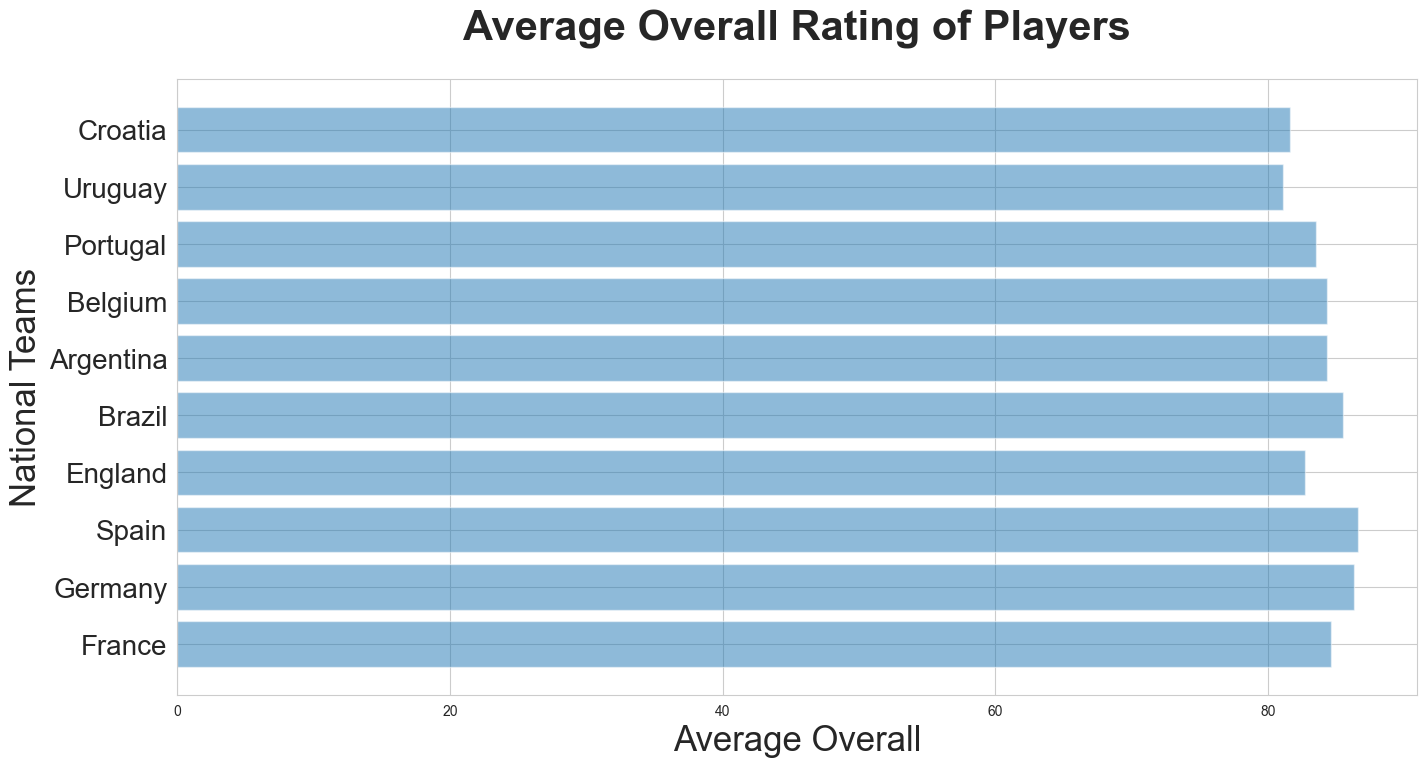

In [108]:
teams = ('France', 'Germany', 'Spain', 'England', 'Brazil', 'Argentina', 'Belgium', 'Portugal', 'Uruguay', 'Croatia')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 85.5, 84.3, 84.3, 83.5, 81.1, 81.6]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

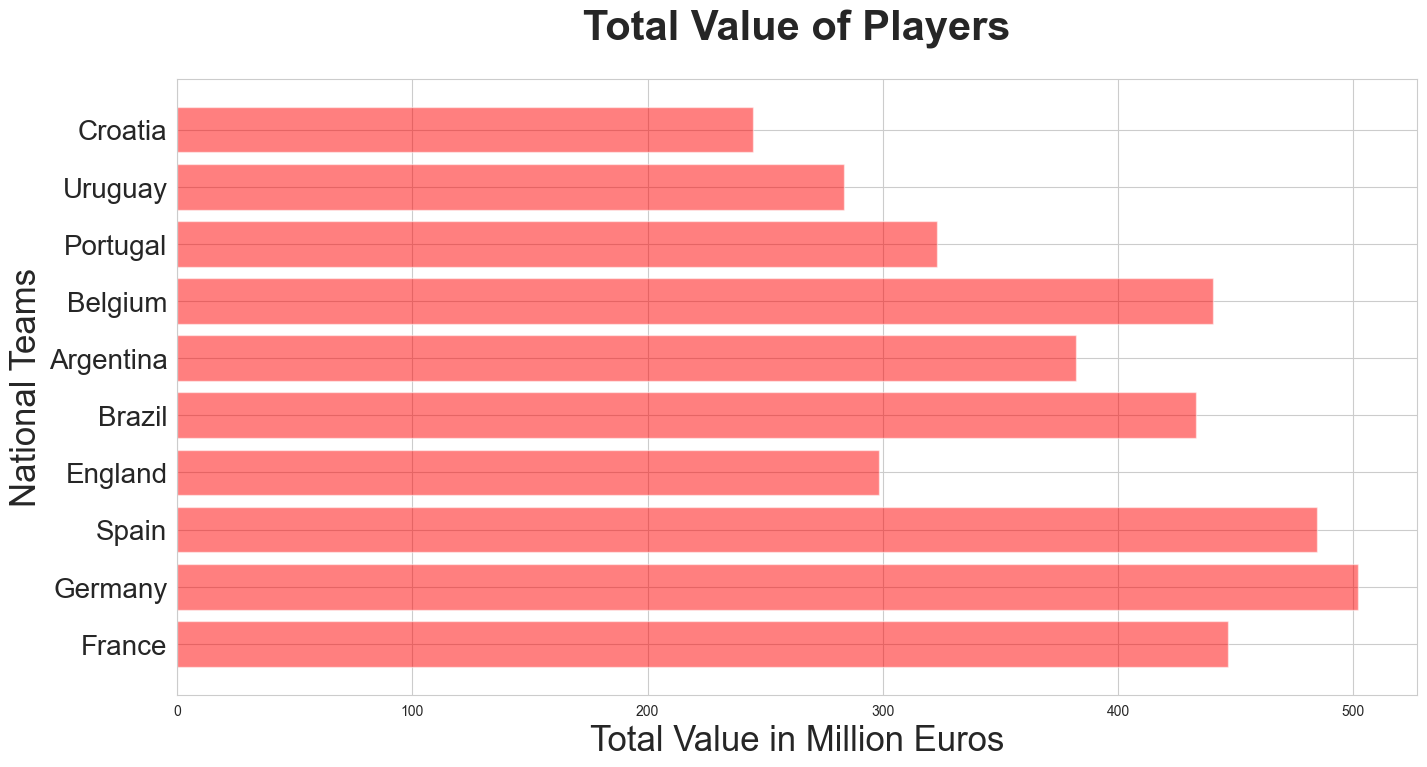

In [109]:
total_value = [446.5, 502, 484.5, 298.5, 433, 382, 440.5, 323, 283.5, 244.9]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

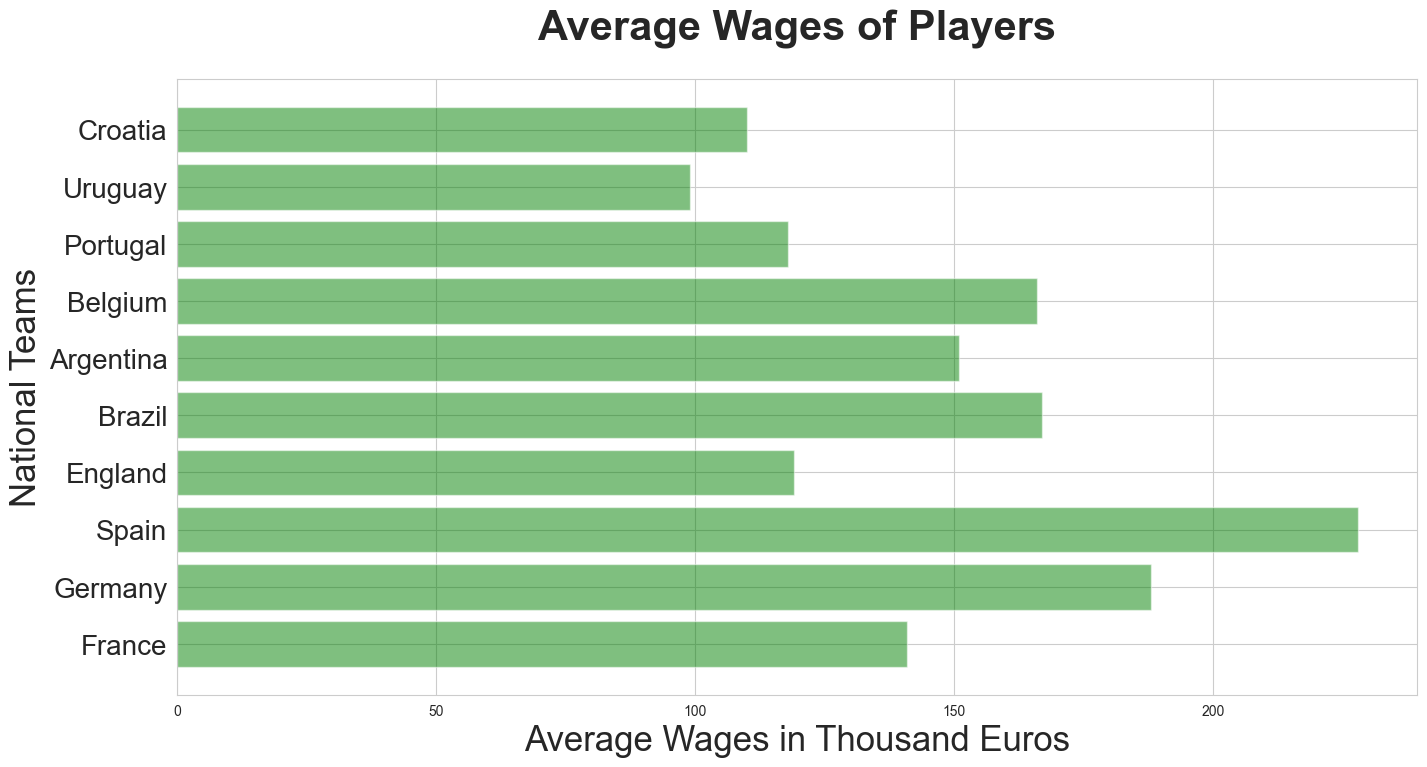

In [110]:
average_wage = [141, 188, 228, 119, 167, 151, 166, 118, 99, 110]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

## Conclusion
So based purely on the FIFA 22 Data:
* Spain has the highest average overall rating, followed by Germany and Brazil. 
* Germany has the highest total value, followed by Spain and France. 
* Spain has the highest average wage, followed by Germany and Brazil.

My bet is for a **Spain vs Germany** in the final, and **Brazil vs France** for the 3rd place. Your turn?